In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

SAVEPLOTS = False

# Define the hopping geometries

In [2]:
def oneDimensionalChain(N):
    HoppingMatrix = np.zeros((N, N))
    ##  Set the elements of the hopping matrix that define PBC corresponding to the ends of the 1D chain
    HoppingMatrix[0, 1] += 1.;
    HoppingMatrix[0, N - 1] += 1.;
    HoppingMatrix[N - 1, 0] += 1.;
    HoppingMatrix[N - 1, N - 2] += 1.;
    ##  Set the remaining ones
    for i in range(1, N - 1):
        HoppingMatrix[i, i - 1] += 1; HoppingMatrix[i, i + 1] += 1;
    return HoppingMatrix

def iRibbon(x, y, z, Nx, Ny):
    return Nx * Ny * z + Nx * y + x

def nanoribbon(N, Ny):
    Nx = int(N / Ny / 2)
    K = np.zeros((2 * Nx * Ny, 2 * Nx * Ny))
    for x in range(Nx):
        for y in range(Ny):
            if y == (Ny - 1) :
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
            else:
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
    for x in range(Nx):
        for y in range(Ny):
            if y == 0 :
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
            else:
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1

    return K

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part


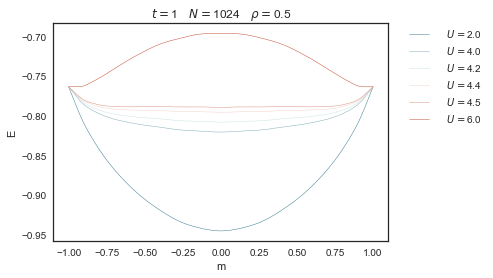

In [3]:
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))
Us = np.array([2., 4., 4.2, 4.4, 4.5, 6.])

fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'm')
plt.ylabel(r'E')

N = 1024
filling = 2 # 2 : quarter filling
Np = int(N / filling)
t = 1

K = oneDimensionalChain(N)

#K = nanoribbon(N, 8)

for idx, U in enumerate(Us):
    
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N

    #eUp = - 2 * t * np.cos(k)
    #eDown = eUp
    
    eUp = la.eigvals(K)
    eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    #plt.figure(idx + 1)
    #plt.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    #plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
    #plt.savefig('mfHubbard' + '.png', dpi = 600)
    
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 0.5)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r'$t=$' + r'' + str(t) + r'$\quadN=$' \
              + r'' + str(N) + r'$\quad\rho=$' + r'' + str(1/filling))
    #plt.savefig('mfHubbard' + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

if SAVEPLOTS == True:
    plt.savefig('mfHubbard' + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


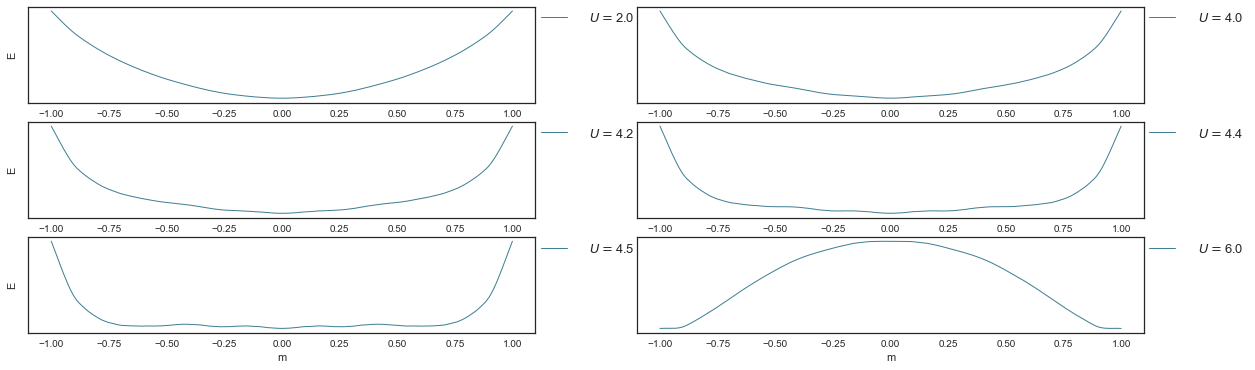

In [4]:
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))
Us = np.array([2., 4., 4.2, 4.4, 4.5, 6.])

f = plt.figure(figsize=(20,6))
nCols = 2

for idx, U in enumerate(Us):
    N = 1024
    filling = 2 # 2 : quarter filling
    Np = int(N / filling)
    t = 1
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    #k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N
    
    #eUp = - 2 * t * np.cos(k)
    #eDown = eUp
    
    eUp = la.eigvals(K)
    eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    ax = f.add_subplot(Us.size/nCols, nCols, idx + 1)
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 13})
    if (idx + 1) > nCols:
        ax.set_xlabel(r'm')
    if (idx + nCols) % nCols == 0:
        ax.set_ylabel(r'E')
    ax.set_yticklabels([])
    
if SAVEPLOTS == True:
    plt.savefig('mfHubbard_multiple' + '.png', dpi = 400, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Non-uniform electron density

In [11]:
N = 128
U = 4
t = 1
mu = 0
beta = 1
filling = 2
Np = int(N / filling)
Nup = np.arange(Np+1)
Ndown = Np - Nup
nIt = 200

nUp = np.random.rand(N)
nDown = np.random.rand(N)

K = oneDimensionalChain(N)

E = np.zeros(Np)

for mismatch in range(Np):
    for it in range(nIt):

        Hup = - t * K + np.eye(N) * ( U * nDown) #- U * np.dot(nUp, nDown) / 2 * np.eye(N)
        Hdown = - t * K + np.eye(N) * ( U * nUp) #- U * np.dot(nUp, nDown) / 2 * np.eye(N)

        eUp = la.eigh(Hup)
        eDown = la.eigh(Hdown)
        idcsUp = (np.argsort(eUp[0]))
        idcsDown = (np.argsort(eDown[0]))

        nUpNew = np.zeros(N)
        nDownNew = np.zeros(N)

        for alpha in range(Nup[mismatch]):
            for i in range(N):
                nUpNew[i] = (eUp[1][:, i][:alpha] ** 2).sum()
        for alpha in range(Ndown[mismatch]):
            for i in range(N):
                nDownNew[i] = (eDown[1][:, i][:beta] ** 2).sum()

        #print(np.dot(nUpNew - nUp, nUpNew - nUp) )

        nUp = nUpNew
        nDown = nDownNew

    E[mismatch] = eUp[0][:Nup[mismatch]].sum() / N + eDown[0][:Ndown[mismatch]].sum() / N - U * np.dot(nUp, nDown)
#print(eUp[0][:Nup[mismatch]].sum() / N + eDown[0][:Ndown[mismatch]].sum() / N- U * np.dot(nUp, nDown) )

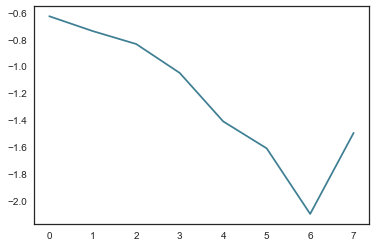

In [10]:
plt.plot(E)

Text(0,0.5,'$\\left\\langle n_{i, \\uparrow} \\right\\rangle$')

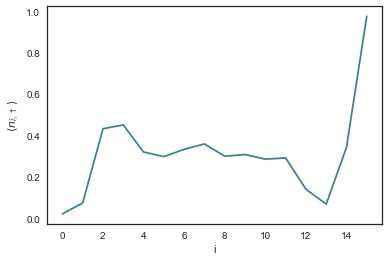

In [546]:
plt.plot(nUp)
plt.xlabel('i')
plt.ylabel(r'$\left\langle n_{i, \uparrow} \right\rangle$')

Text(0,0.5,'$\\left\\langle n_{i, \\downarrow} \\right\\rangle$')

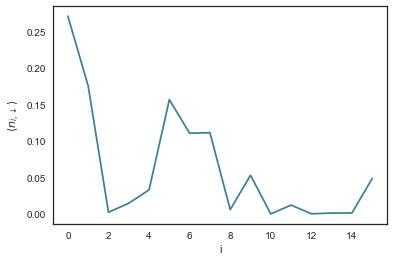

In [547]:
plt.plot(nDown)
plt.xlabel('i')
plt.ylabel(r'$\left\langle n_{i, \downarrow} \right\rangle$')